<a href="https://colab.research.google.com/github/igors96/Random_Forest_Boston_Housing/blob/main/RF_boston_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

import sklearn.datasets
import sklearn.model_selection
import sklearn.metrics
import sklearn.ensemble

In [3]:
boston = sklearn.datasets.load_boston()
boston

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [4]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
X,y = boston.data, boston.target

In [6]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.1, random_state = 0)

In [7]:
m = sklearn.ensemble.RandomForestRegressor()

In [8]:
m.fit(X_train, y_train)

RandomForestRegressor()

In [9]:
y_test_pred = m.predict(X_test)

Text(0, 0.5, 'y_test_pred')

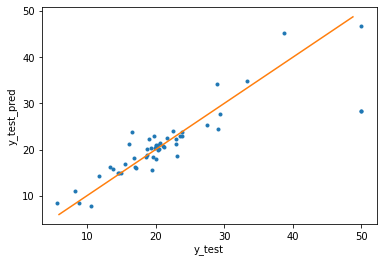

In [10]:
# plotando valores verdadeiros contra predições
plt.plot(y_test, y_test_pred, '.')

# plotando a reta x = y
plt.plot(plt.gca().get_ylim(), plt.gca().get_ylim())

# legenda dos eixos
plt.xlabel('y_test')
plt.ylabel('y_test_pred')

In [11]:
mae = sklearn.metrics.mean_absolute_error(y_test, y_test_pred)
r2 = sklearn.metrics.r2_score(y_test, y_test_pred)

print(f'MAE: {mae}')
print(f'r2: {r2}')

MAE: 2.632254901960782
r2: 0.7145213821379339


In [12]:
def rmse(x,y): 
    
    return np.sqrt(sklearn.metrics.mean_squared_error(x,y))

def display_score(m):
    
    res = [[rmse(m.predict(X_train), y_train), m.score(X_train, y_train)],
          [rmse(m.predict(X_test), y_test), m.score(X_test, y_test)]]
    
    score = pd.DataFrame(res, columns=['RMSE','R2'], index = ['Treino','Teste'])
    
    if hasattr(m, 'oob_score_'): 
        score.loc['OOB'] = [rmse(y_train, m.oob_prediction_), m.oob_score_]
        
    display(score)

In [13]:
m_base = sklearn.ensemble.RandomForestRegressor(n_jobs = -1, oob_score = True, random_state = 0)
%time m_base.fit(X_train, y_train)
display_score(m_base)

CPU times: user 606 ms, sys: 15.6 ms, total: 622 ms
Wall time: 930 ms


,RMSE,R2
Treino,1.321933,0.979220
Teste,5.562483,0.640319
OOB,3.368729,0.865052


In [14]:
def plotar_importancias(modelo, tags, n=10):
    
    fig, ax = plt.subplots(1,2, figsize = (20,4))

    coefs = []
    abs_coefs = []

    if hasattr(modelo,'coef_'):
        imp = modelo.coef_
    elif hasattr(modelo,'feature_importances_'):
        imp = modelo.feature_importances_
    else:
        print('Tente novamente.')
        return

    coefs = (pd.Series(imp, index = tags))
    coefs.plot(use_index=False, ax=ax[0]);
    abs_coefs = (abs(coefs)/(abs(coefs).sum()))
    abs_coefs.sort_values(ascending=False).plot(use_index=False, ax=ax[1],marker='.')

    ax[0].set_title('Importâncias relativas das variáveis')
    ax[1].set_title('Importâncias relativas das variáveis - ordem decrescente')

    abs_coefs_df = pd.DataFrame(np.array(abs_coefs).T,
                                columns = ['Importancias'],
                                index = tags)

    df = abs_coefs_df['Importancias'].sort_values(ascending=False)
    
    print(df.iloc[0:n])
    plt.figure()
    df.iloc[0:n].plot(kind='barh', figsize=(15,0.25*n), legend=False)
    
    return df

In [15]:
np.array(boston)

array({'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 1